## Problem statement 

Food Delivery services like zomato and swiggy need to show the accurate time it will take to deliever your order to keep transparency with their customers. These companies use ML algorithms to predict the food delivery time based on how much time the delivery partners took for the same distance in the past.

To predict the food delivery time in real-time, we need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurants and the delivery locations. we need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import folium
from math import radians,sin,cos,sqrt,atan2

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import  KNNImputer

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv(r"C:\ML_Projects\ML_Food_Delivery_Project\notebooks\data\Zomato.csv")

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [7]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [9]:
# Unique values 

for i in df.columns:
    print(f"No. of unique values in {i} : {df[i].nunique()}")
    print('-------------------------------------------------')
    if (df[i].nunique()) < 8:
        print(f'            unique values are : {df[i].unique()}')
        print("##############################################")
    else:
        pass

No. of unique values in ID : 45584
-------------------------------------------------
No. of unique values in Delivery_person_ID : 1320
-------------------------------------------------
No. of unique values in Delivery_person_Age : 22
-------------------------------------------------
No. of unique values in Delivery_person_Ratings : 28
-------------------------------------------------
No. of unique values in Restaurant_latitude : 657
-------------------------------------------------
No. of unique values in Restaurant_longitude : 518
-------------------------------------------------
No. of unique values in Delivery_location_latitude : 4373
-------------------------------------------------
No. of unique values in Delivery_location_longitude : 4373
-------------------------------------------------
No. of unique values in Order_Date : 44
-------------------------------------------------
No. of unique values in Time_Orderd : 176
-------------------------------------------------
No. of unique

In [10]:
# Lets create some features with our existing features

feature = []
dtypes = []
count = []
unique = []
missing = []
missing_percentage = []

for column in df.columns:
    feature.append(column)
    count.append(len(df[column]))
    missing.append(df[column].isnull().sum())
    unique.append(df[column].nunique())
    missing_percentage.append((df[column].isnull().sum()/df.shape[0])*100)
    dtypes.append(df[column].dtypes)

dataframe = pd.DataFrame({
    'feature':feature,
    'count':count,
    'missing':missing,
    'nunique':unique,
    'missing_percentage':missing_percentage,
    'dtypes':dtypes

})

dataframe.set_index('feature')

,count,missing,nunique,missing_percentage,dtypes
feature,,,,,
ID,45584,0,45584,0.000000,object
Delivery_person_ID,45584,0,1320,0.000000,object
Delivery_person_Age,45584,1854,22,4.067217,float64
Delivery_person_Ratings,45584,1908,28,4.185679,float64
Restaurant_latitude,45584,0,657,0.000000,float64
Restaurant_longitude,45584,0,518,0.000000,float64
Delivery_location_latitude,45584,0,4373,0.000000,float64
Delivery_location_longitude,45584,0,4373,0.000000,float64
Order_Date,45584,0,44,0.000000,object


#### Now we will remove age and ID column because this columns is not important while analysis

In [11]:
df.drop('ID',axis=1,inplace=True)

In [12]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


### Changing datetime columns in datetime

In [13]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'],format='mixed')

In [14]:
df['Order_Date']

0       2022-12-02
1       2022-02-13
2       2022-04-03
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-11-03
45582   2022-07-03
45583   2022-02-03
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [15]:
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month
df['day'] = df['Order_Date'].dt.day

In [16]:
df.tail()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
45579,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35,11:45,...,1,Meal,motorcycle,0.0,No,Metropolitian,32,2022,3,24
45580,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55,20:10,...,0,Buffet,motorcycle,1.0,No,Metropolitian,36,2022,2,16
45581,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-11-03,23:50,24:05:00,...,1,Drinks,scooter,0.0,No,Metropolitian,16,2022,11,3
45582,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-07-03,13:35,13:40,...,0,Snack,motorcycle,1.0,No,Metropolitian,26,2022,7,3
45583,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,2022-02-03,17:10,17:15,...,2,Snack,scooter,1.0,No,Metropolitian,36,2022,2,3


In [17]:
## Dropping Order date column

df.drop('Order_Date',axis=1,inplace=True)

In [18]:
## Dropping Null Values
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [19]:
df.dropna(subset=['Time_Orderd'],inplace=True)

In [20]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.',':')

In [21]:
df['Time_Orderd'].sample(10)

27601          20:45
6341           18:10
4037           21:30
1235           16:45
38351          18:20
14507          08:40
42625    0:791666667
36655              1
15731          16:15
37472          20:20
Name: Time_Orderd, dtype: object

In [22]:
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'
    
df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)

In [23]:
a = '56/2234'
aa = (a.split('/')[0])
aa

'56'

In [24]:
bb = a.split('/')[1][:2]
bb

'22'

In [25]:
cc = aa + ':' + bb
cc

'56:22'

In [26]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,12,2
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,4,3
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [27]:
df['TimeOrder_Hour'] = df['Time_Orderd'].str.split(':',expand=True)[0]
df['TimeOrder_Hour'] = df['TimeOrder_Hour'].replace('0','00')
df['TimeOrder_Hour'] = df['TimeOrder_Hour'].astype('int32')

In [28]:
df['TimeOrder_Min'] = df['Time_Orderd'].str.split(':',expand=True)[1]
df['TimeOrder_Min'] = df['TimeOrder_Min'].astype('int32')

In [29]:
df.dtypes

Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int32
month                            int32
day                              int32
TimeOrder_Hour                   int32
TimeOrder_Min                    int32
dtype: object

In [30]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_Min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,motorcycle,3.0,No,Metropolitian,46,2022,12,2,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,scooter,1.0,No,Metropolitian,21,2022,4,3,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [31]:
## Now Playing with Time_Order_picked
df['Time_Order_picked']  =df['Time_Order_picked'].str.replace('.',':')

In [32]:
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'
    
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [33]:
df['TimeOrder_picked_Hour'] = df['Time_Order_picked'].str.split(':',expand=True)[0]

df['TimeOrder_picked_Hour'] = df['TimeOrder_picked_Hour'].astype('int32')

In [34]:
df['TimeOrder_picked_Min'] = df['Time_Order_picked'].str.split(':',expand=True)[1]
df['TimeOrder_picked_Min'] = df['TimeOrder_picked_Min'].astype('int32')

In [35]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_Min,TimeOrder_picked_Hour,TimeOrder_picked_Min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,No,Metropolitian,46,2022,12,2,21,55,22,10
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,No,Metropolitian,23,2022,2,13,14,55,15,5
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,No,Metropolitian,21,2022,4,3,17,30,17,40
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,No,Metropolitian,20,2022,2,13,9,20,9,30
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,No,Metropolitian,41,2022,2,14,19,50,20,5


#### Extracting City from delievery person_ID

In [36]:
df['Delivery_city'] = df['Delivery_person_ID'].str.split('RES',expand=True)[0]

In [37]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_Min,TimeOrder_picked_Hour,TimeOrder_picked_Min,Delivery_city
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,Metropolitian,46,2022,12,2,21,55,22,10,DEH
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,Metropolitian,23,2022,2,13,14,55,15,5,KOC
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,Metropolitian,21,2022,4,3,17,30,17,40,PUNE
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,Metropolitian,20,2022,2,13,9,20,9,30,LUDH
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,Metropolitian,41,2022,2,14,19,50,20,5,KNP


In [38]:
df['Delivery_city'].value_counts()

Delivery_city
JAP       3331
RANCHI    3097
SUR       3068
COIMB     3063
HYD       3063
BANG      3055
MUM       3055
MYS       3048
INDO      3041
VAD       3037
CHEN      3016
PUNE      3009
AGR        741
LUDH       732
KNP        710
ALH        706
DEH        700
GOA        684
KOC        679
AURG       678
KOL        675
BHP        665
Name: count, dtype: int64

In [39]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_Min', 'TimeOrder_picked_Hour', 'TimeOrder_picked_Min',
       'Delivery_city'],
      dtype='object')

In [40]:
## Checking Restaurant Latitude
df['Restaurant_latitude'].dtype

dtype('float64')

In [41]:
df['Delivery_person_Ratings'].isnull().sum()

268

In [42]:
## now we are going to fill null values in Del_Person_ratings
rating_map = round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()

df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

In [43]:
df['Delivery_person_Ratings'].isnull().sum()

0

In [44]:
df.dtypes

Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int32
month                            int32
day                              int32
TimeOrder_Hour                   int32
TimeOrder_Min                    int32
TimeOrder_picked_Hour            int32
TimeOrder_picked_Min             int32
Delivery_city            

## Working with Map

In [45]:
folium.Map(tiles='cartodb positron')

In [46]:
## Lattitude and Longitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0,how='any',subset=None,inplace=True)
color_scale =[(0,'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat='Restaurant_latitude',lon='Restaurant_longitude',
                        color_continuous_scale=color_scale,zoom=8,height=1000,width=1000)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [47]:
# Latitude of India is 8°4' N to 37°6' north
# Longitude of India is 68°7'E  to 97°25' East

# This dataset is related to India but in some of latitude is given in negative(-)
# Negative lattitude is related to indian ocean

# so that there is a much chances that negative sign in in latitude is by mistake (OUTLIERS)

In [48]:
# Changing Negative latitude to Positive latitude

"""
abs() function return the absolute value. The absolute value of any number is always 
positive it removes the negative sign of a number in Python.
"""

df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

##### To calculate the distance between two points on a sphere (such as the Earth), we can use the Haversine formula

In [49]:
import math

def distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    dist = R * c
    
    return dist
df['distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [50]:
df['distance'].head()

0    10.280582
1     6.242319
2    13.787860
3     2.930258
4    19.396618
Name: distance, dtype: float64

In [51]:
df.groupby(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])['distance'].max().head(40)

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude
0.000000             0.000000              0.010000                    0.010000                        1.572534
                                           0.020000                    0.020000                        3.145067
                                           0.030000                    0.030000                        4.717601
                                           0.040000                    0.040000                        6.290135
                                           0.050000                    0.050000                        7.862668
                                           0.060000                    0.060000                        9.435202
                                           0.070000                    0.070000                       11.007735
                                           0.080000                    0.080000                       12.580268
     

In [52]:
# droping those lattitude and longitude which are less than and above to
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East

In [53]:
df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].shape

# these 3509 record is of no use. bcz the wrong lattitude is mention

(3509, 27)

In [54]:
# droping  where  restaurant_lattitude and delivery_location_latitude less than 8

df = df.drop(df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].index)

In [55]:
df[(df['Restaurant_latitude'] > 37) & (df['Delivery_location_latitude'] > 37)]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_Min,TimeOrder_picked_Hour,TimeOrder_picked_Min,Delivery_city,distance


In [56]:
df[(df['Restaurant_longitude'] < 68) & (df['Delivery_location_longitude'] < 68)]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_Min,TimeOrder_picked_Hour,TimeOrder_picked_Min,Delivery_city,distance


In [57]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_Min', 'TimeOrder_picked_Hour', 'TimeOrder_picked_Min',
       'Delivery_city', 'distance'],
      dtype='object')

### minimum distance 

In [58]:
min_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].min().sort_values(by='distance',ascending=True).head()
min_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.839820,30.924057,75.849820
1.465123,30.905562,75.832841,30.915562,75.842841
1.465140,30.902872,75.826808,30.912872,75.836808
1.465159,30.899992,75.831338,30.909992,75.841338
1.465161,30.899584,75.809346,30.909584,75.819346


##### Minimun Distance co-ordinates

In [59]:
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[30.914057, 75.83982], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[30.924057, 75.84982], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[30.914057, 75.83982], [30.924057, 75.84982]], color='red').add_to(m)

# Display the map

fig2.add_child(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m




### maximum distance

In [60]:
max_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].max().sort_values(by='distance',ascending=False).head(1)
max_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
20.969489,25.443994,81.860187,25.583994,82.000187


#### MAximum Distance co-ordinates

In [61]:
tooltips=f"Distance: {df['distance'].max()} km"

In [62]:
import folium
from branca.element import Figure
fig2=Figure(width=850,height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[25.443994, 81.860187], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[25.443994, 81.860187], popup="Restaurant",icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[25.583994, 82.000187], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[25.443994, 81.860187], [25.583994,82.000187]], color='red',tooltip=tooltips).add_to(m)

# Display the map

fig2.add_child(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Water Color').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)
m

In [63]:
## More EDA

In [64]:
df.dtypes

Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int32
month                            int32
day                              int32
TimeOrder_Hour                   int32
TimeOrder_Min                    int32
TimeOrder_picked_Hour            int32
TimeOrder_picked_Min             int32
Delivery_city            

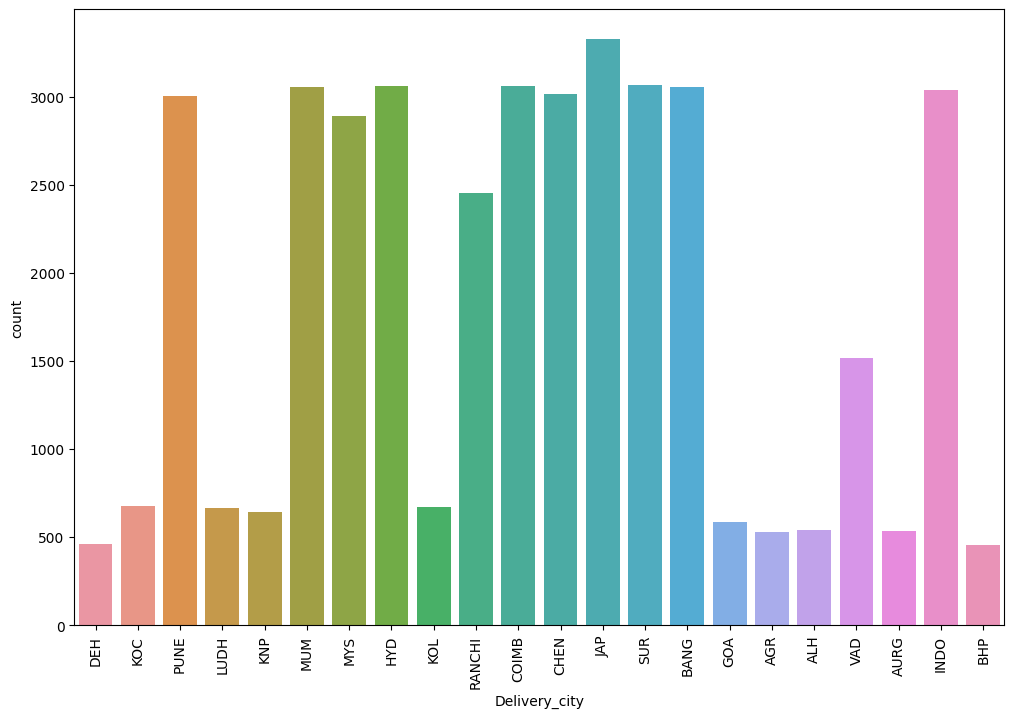

In [65]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['Delivery_city'])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
# cities like-  pune, mumbai, mysore, hyderabaad , chennai, banglore, indore, ranchi 
# in these cities more no. of food is ordered

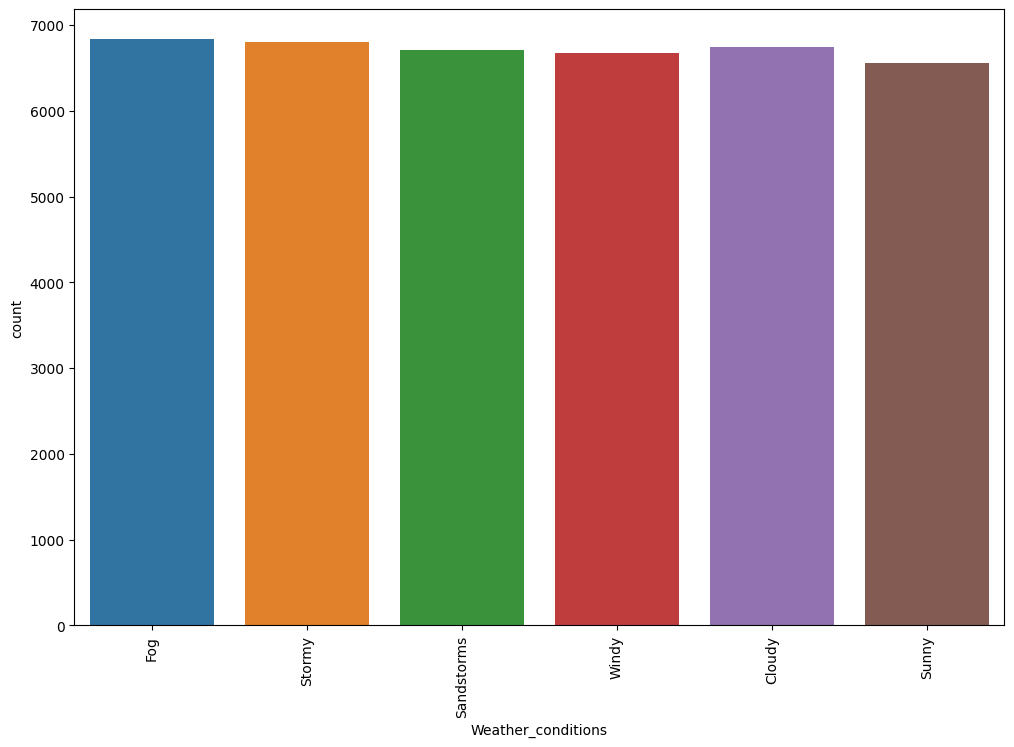

In [67]:

plt.figure(figsize=(12,8))
sns.countplot(x=df['Weather_conditions'])
plt.xticks(rotation='vertical')
plt.show()

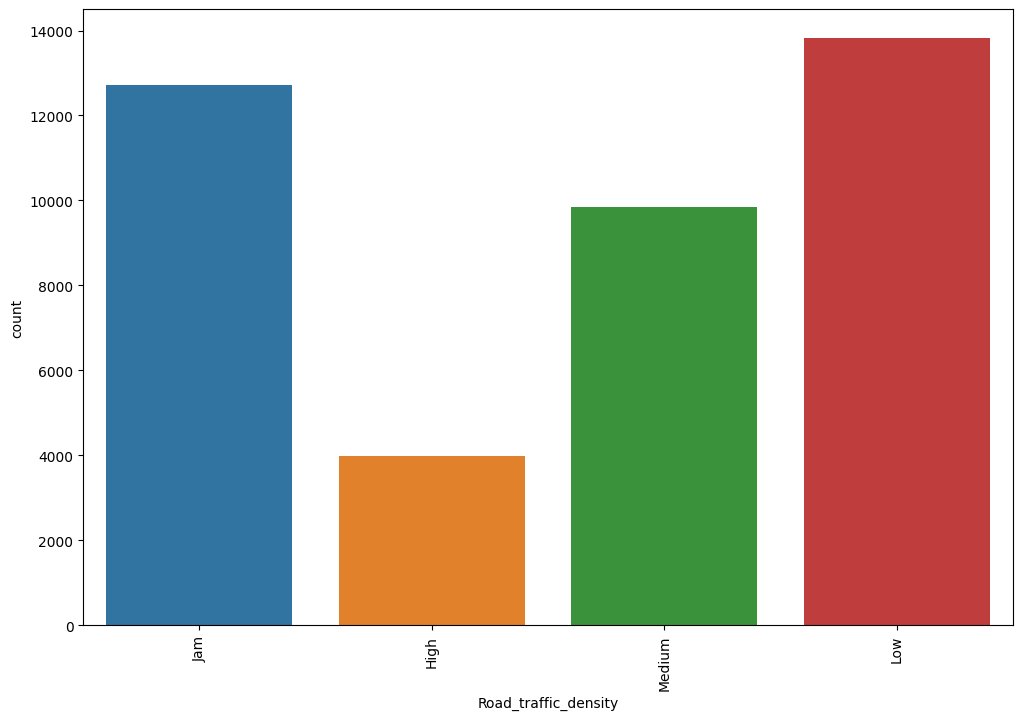

In [68]:

plt.figure(figsize=(12,8))
sns.countplot(x=df['Road_traffic_density'])
plt.xticks(rotation='vertical')
plt.show()

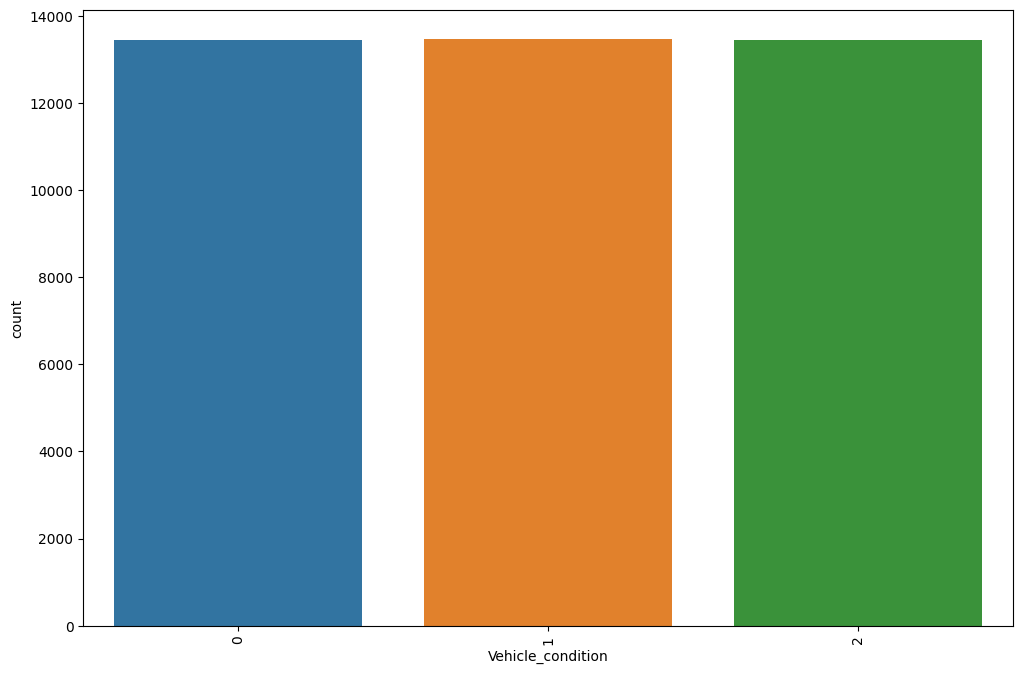

In [69]:

plt.figure(figsize=(12,8))
sns.countplot(x=df['Vehicle_condition'])
plt.xticks(rotation='vertical')
plt.show()

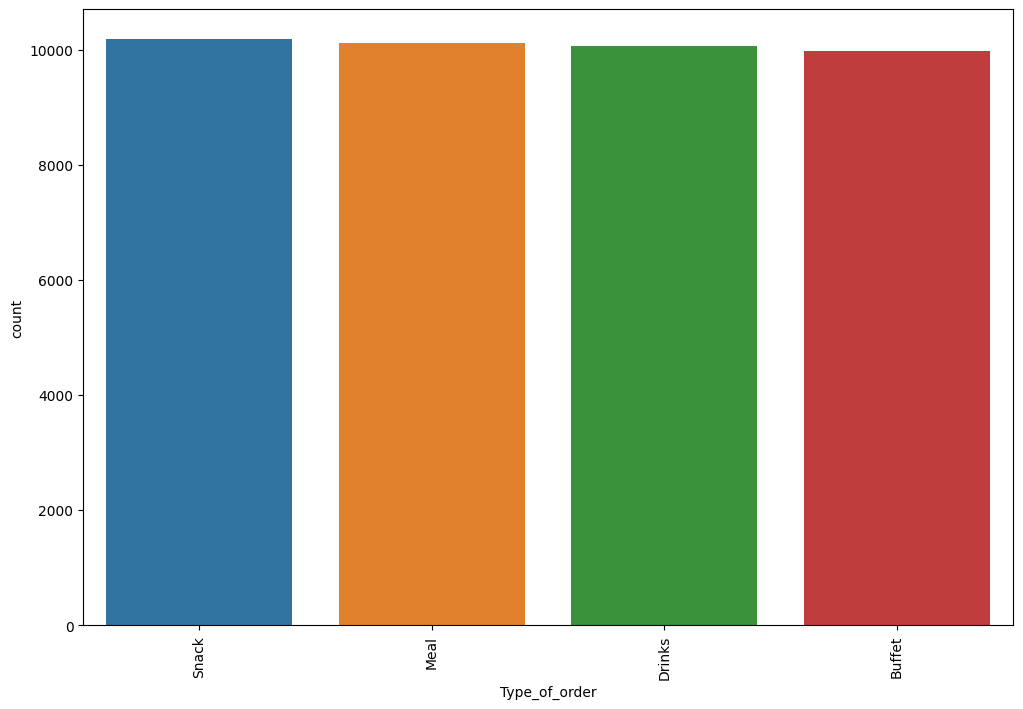

In [70]:

plt.figure(figsize=(12,8))
sns.countplot(x=df['Type_of_order'])
plt.xticks(rotation='vertical')
plt.show()

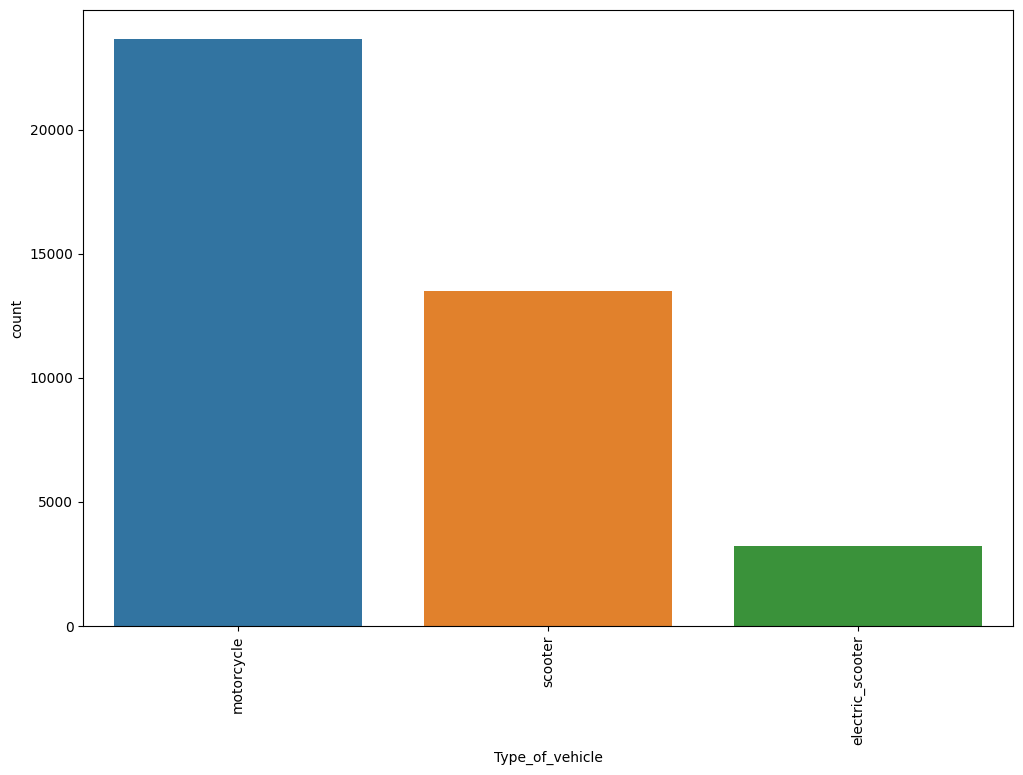

In [71]:

plt.figure(figsize=(12,8))
sns.countplot(x=df['Type_of_vehicle'])
plt.xticks(rotation='vertical')
plt.show()

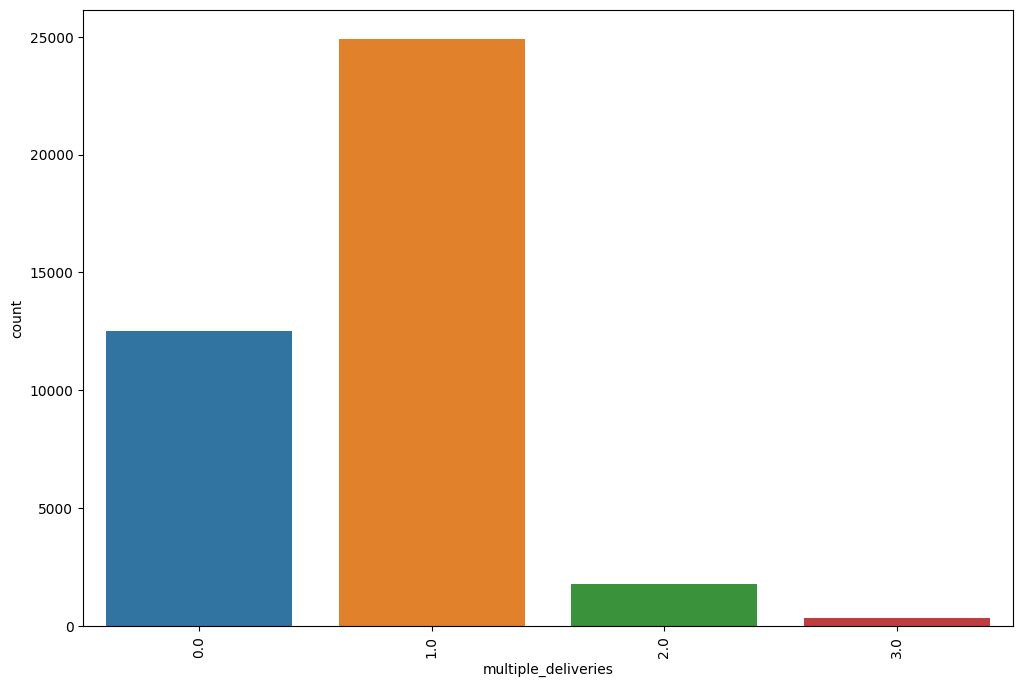

In [72]:

plt.figure(figsize=(12,8))
sns.countplot(x=df['multiple_deliveries'])
plt.xticks(rotation='vertical')
plt.show()

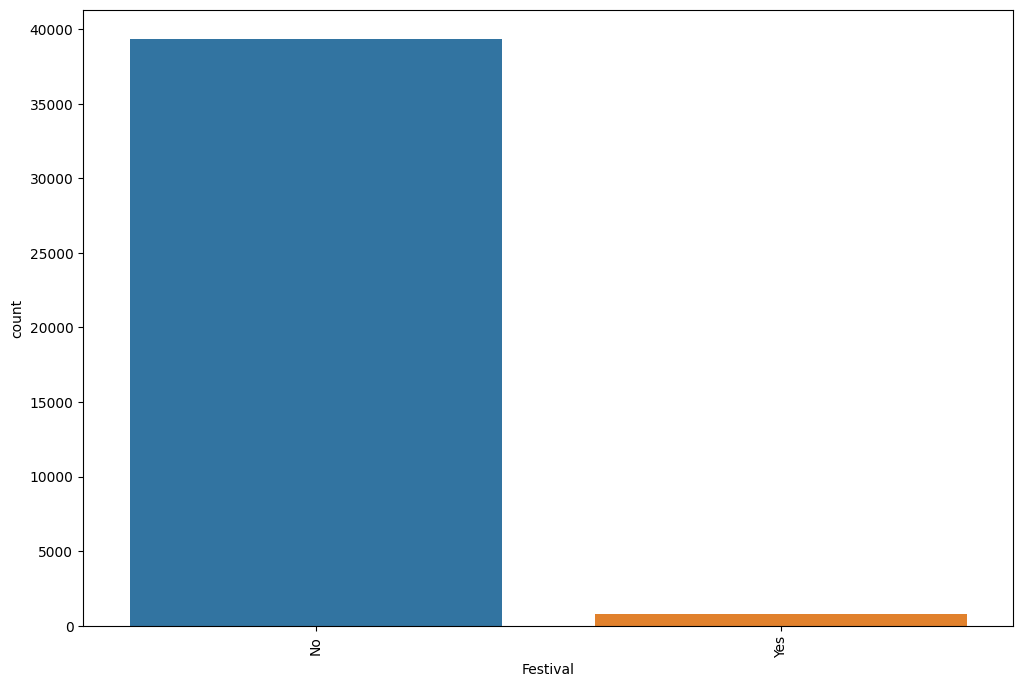

In [73]:

plt.figure(figsize=(12,8))
sns.countplot(x=df['Festival'])
plt.xticks(rotation='vertical')
plt.show()

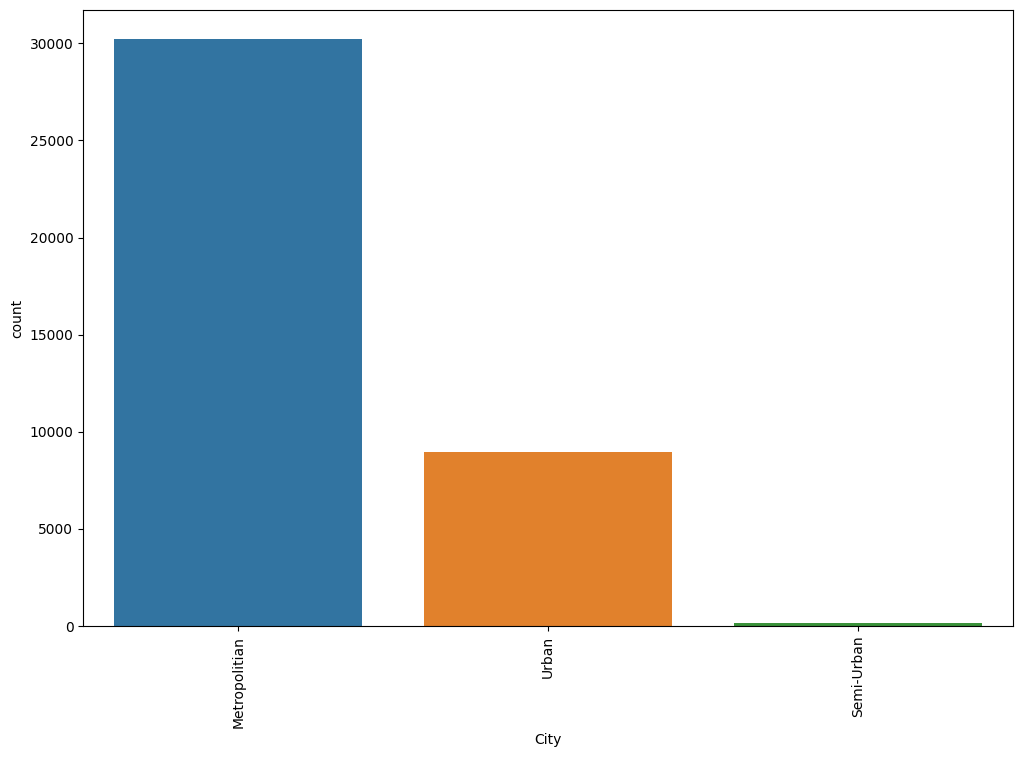

In [74]:

plt.figure(figsize=(12,8))
sns.countplot(x=df['City'])
plt.xticks(rotation='vertical')
plt.show()

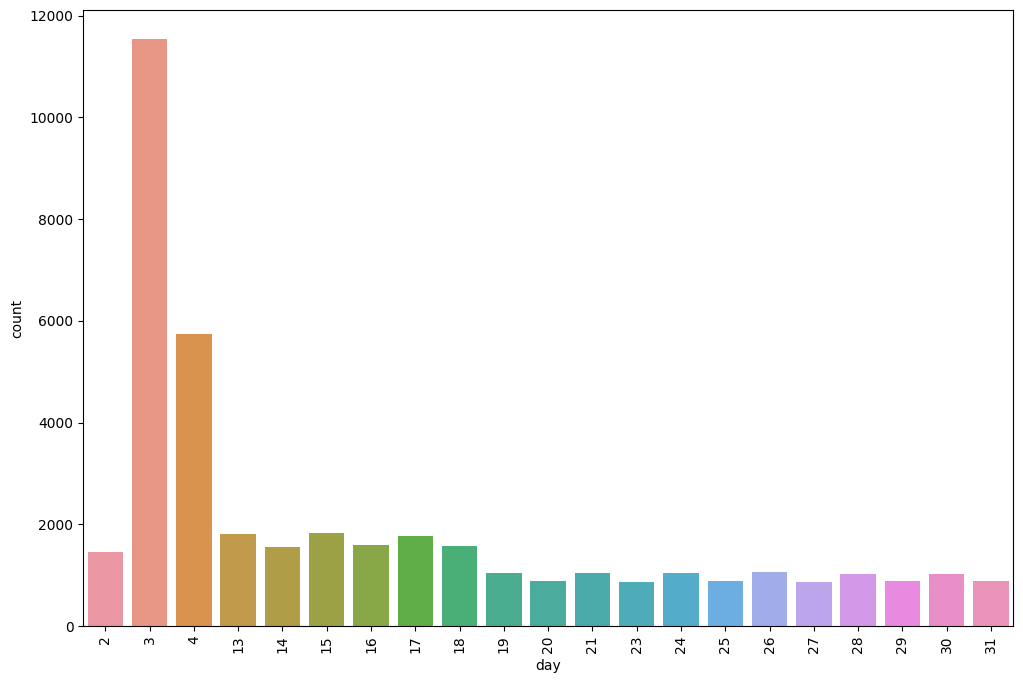

In [75]:

plt.figure(figsize=(12,8))
sns.countplot(x=df['day'])
plt.xticks(rotation='vertical')
plt.show()

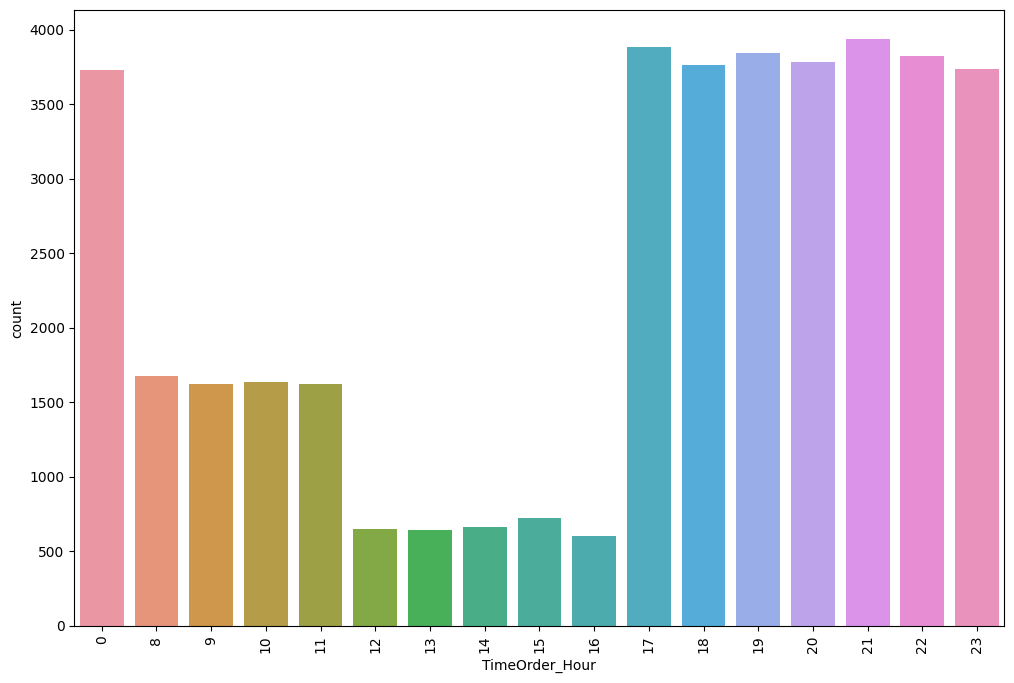

In [76]:
plt.figure(figsize=(12,8))

sns.countplot(x=df['TimeOrder_Hour'])
plt.xticks(rotation='vertical')
plt.show()

In [77]:
# more no. of order is b/w 8 -11 and eveing 5 to night 12
# people more ofter deliver food in the evening and morning time

In [78]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_Min', 'TimeOrder_picked_Hour', 'TimeOrder_picked_Min',
       'Delivery_city', 'distance'],
      dtype='object')

In [79]:
df.dtypes

Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int32
month                            int32
day                              int32
TimeOrder_Hour                   int32
TimeOrder_Min                    int32
TimeOrder_picked_Hour            int32
TimeOrder_picked_Min             int32
Delivery_city            

In [80]:
df.groupby(['Festival'])['Time_taken (min)'].median().to_frame().reset_index()


,Festival,Time_taken (min)
0,No,25.0
1,Yes,45.0


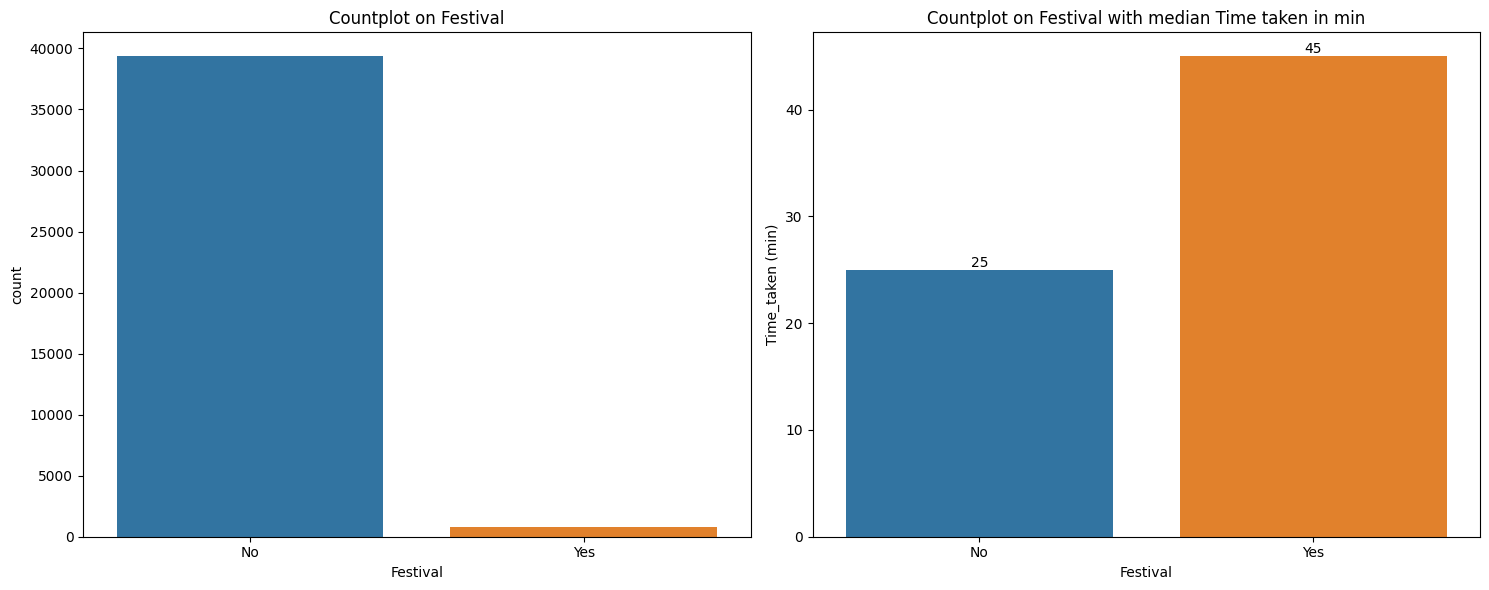

In [81]:
# plotting a countplot of Festival and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x=df['Festival'])
plt.title("Countplot on Festival")

plt.subplot(1,2,2)
data1 = df.groupby(['Festival'])['Time_taken (min)'].median().reset_index()
ax = sns.barplot(x='Festival', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Festival with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i)

plt.show()

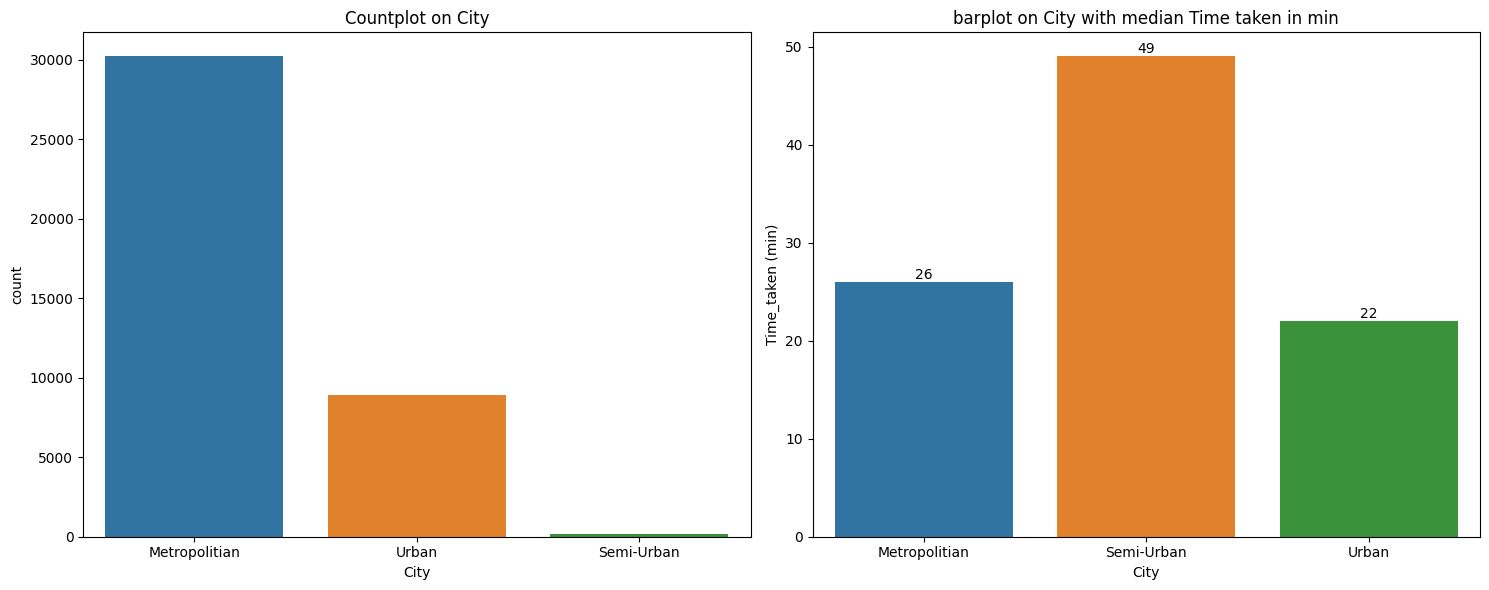

In [82]:
# plotting a countplot of City and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x=df['City'])
plt.title("Countplot on City")

plt.subplot(1,2,2)
data1 = df.groupby(['City'])['Time_taken (min)'].median().reset_index()
ax = sns.barplot(x='City', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('barplot on City with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i)

plt.show()

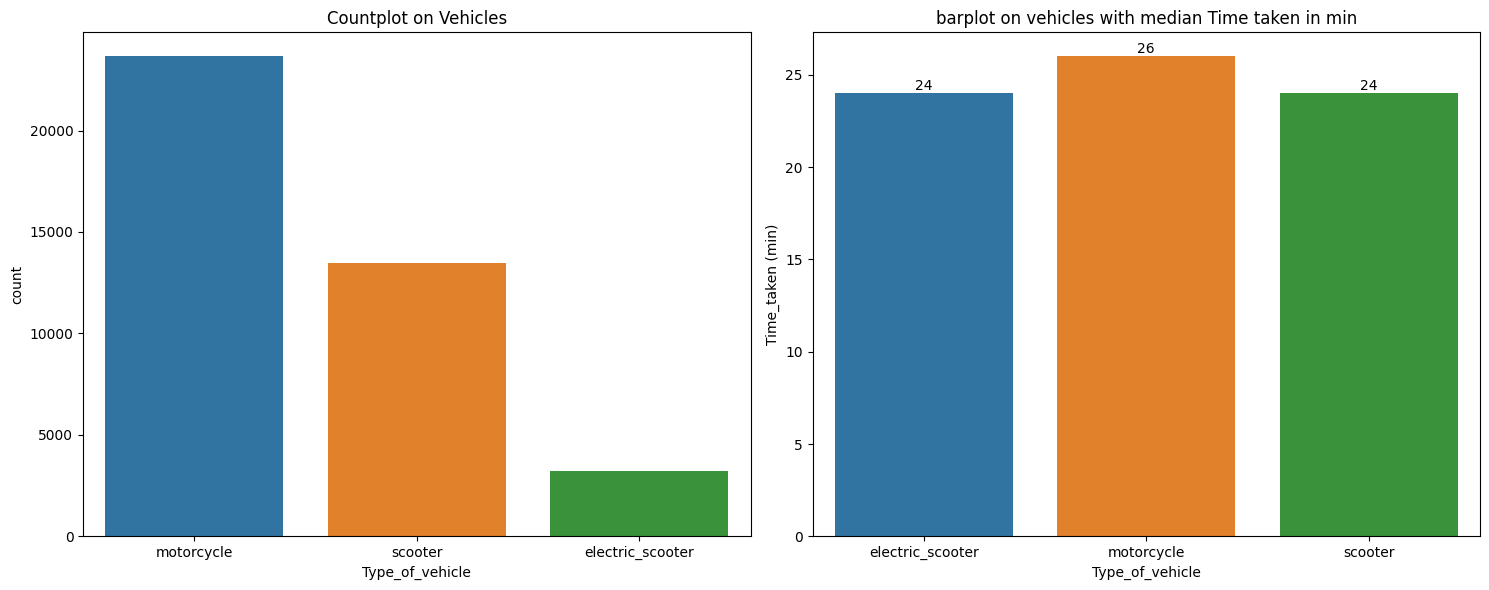

In [83]:
# plotting a countplot of Type_of_vehicle and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x=df['Type_of_vehicle'])
plt.title("Countplot on Vehicles")

plt.subplot(1,2,2)
data1 = df.groupby(['Type_of_vehicle'])['Time_taken (min)'].median().reset_index()
ax = sns.barplot(x='Type_of_vehicle', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('barplot on vehicles with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i)

plt.show()

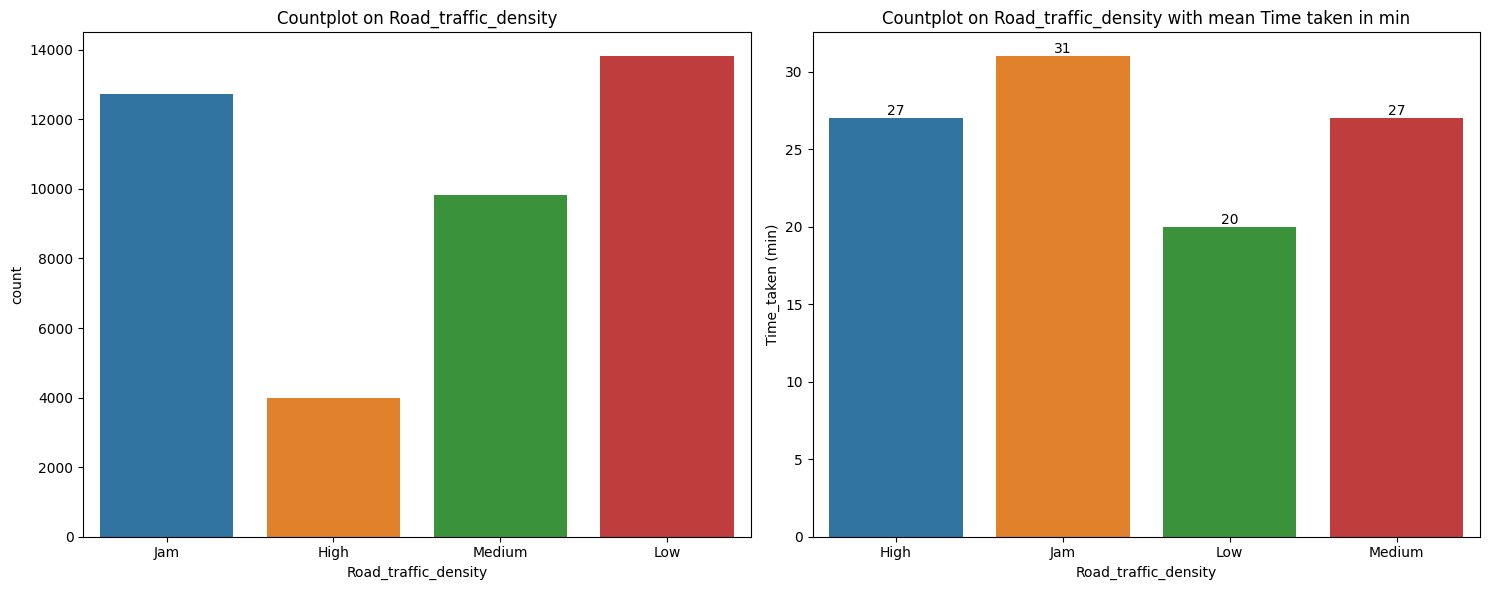

In [84]:
# plotting a countplot of Road traffic density and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x=df['Road_traffic_density'])
plt.title("Countplot on Road_traffic_density")

plt.subplot(1,2,2)
data1 = df.groupby(['Road_traffic_density'])['Time_taken (min)'].median().reset_index()
ax = sns.barplot(x='Road_traffic_density', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Road_traffic_density with mean Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i)

plt.show()

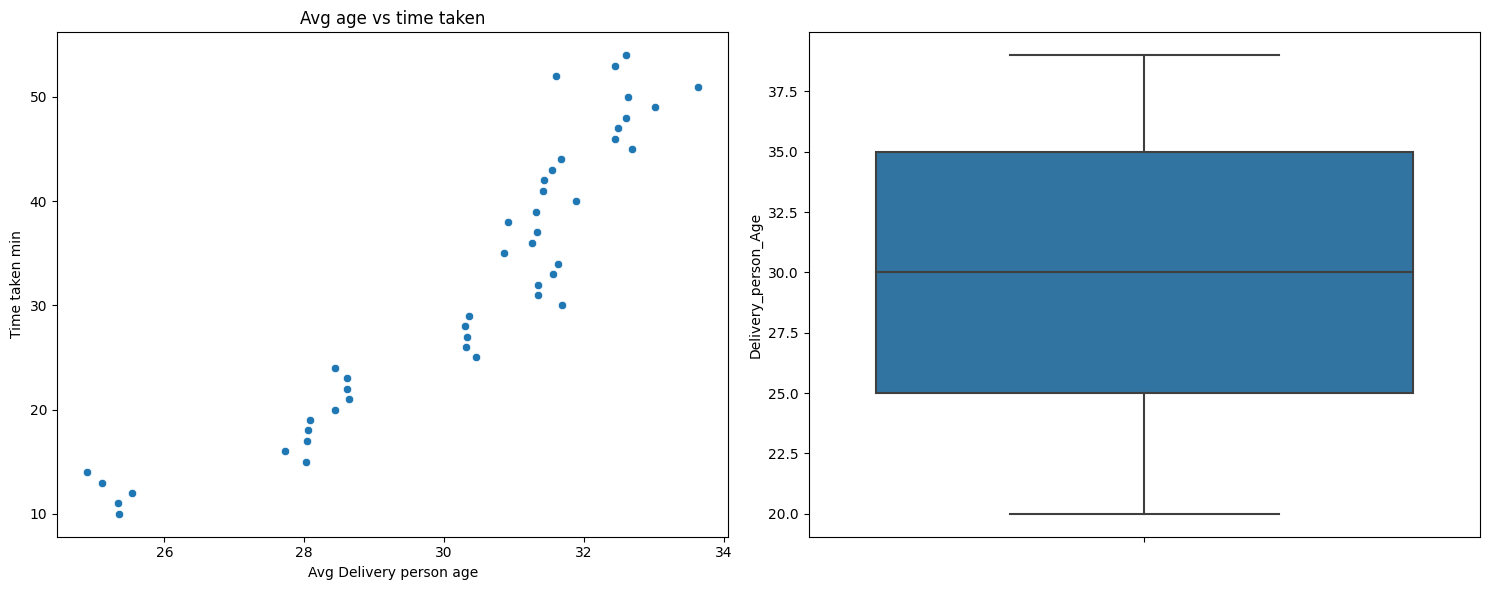

In [85]:
# The avg delivery person age w.r.t Time taken in min
data1 = df.groupby(['Time_taken (min)'])['Delivery_person_Age'].mean().reset_index()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x='Delivery_person_Age',y='Time_taken (min)',data=data1)
plt.xlabel('Avg Delivery person age')
plt.ylabel("Time taken min")
plt.title('Avg age vs time taken')

plt.subplot(1,2,2)
sns.boxplot(y=df['Delivery_person_Age'])
plt.tight_layout()
plt.show()

In [86]:
# as the age is increses the time of delivery is also inc.

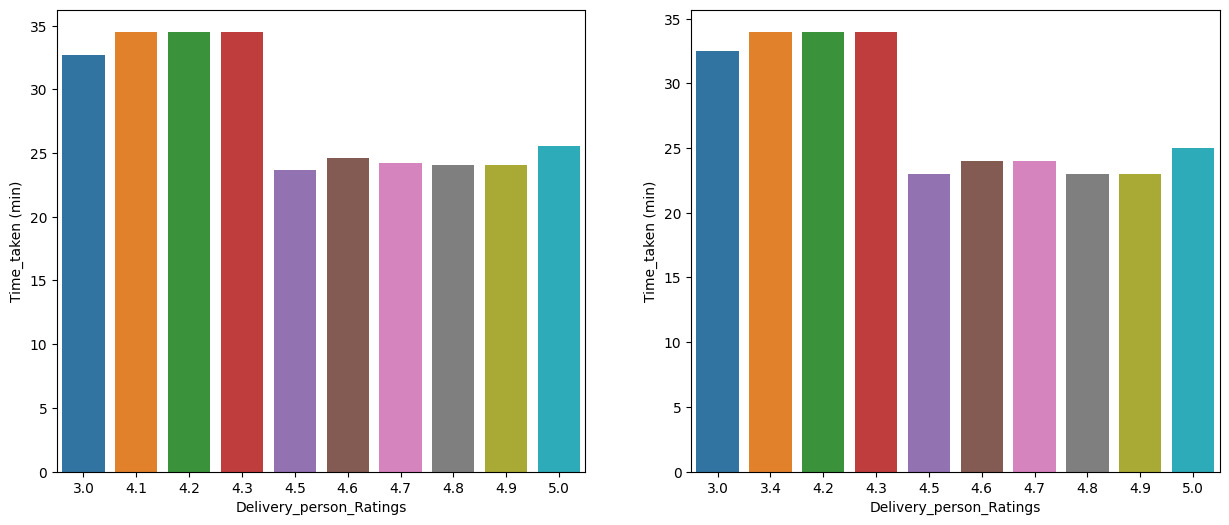

In [87]:
data1 = df.groupby(['Delivery_person_Ratings'])['Time_taken (min)'].mean().reset_index()
data1.sort_values('Time_taken (min)',inplace=True)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=data1.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')

data2 = df.groupby(['Delivery_person_Ratings'])['Time_taken (min)'].median().reset_index()
data2.sort_values('Time_taken (min)',inplace=True)
plt.subplot(1,2,2)
sns.barplot(data=data2.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')
plt.show()

In [88]:
# person with lower rating is taking more time

In [89]:
## Now lets do more feature engineering

In [90]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_Min,TimeOrder_picked_Hour,TimeOrder_picked_Min,Delivery_city,distance
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,46,2022,12,2,21,55,22,10,DEH,10.280582
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,23,2022,2,13,14,55,15,5,KOC,6.242319
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,21,2022,4,3,17,30,17,40,PUNE,13.787860
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,20,2022,2,13,9,20,9,30,LUDH,2.930258
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,41,2022,2,14,19,50,20,5,KNP,19.396618


In [91]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_Min', 'TimeOrder_picked_Hour', 'TimeOrder_picked_Min',
       'Delivery_city', 'distance'],
      dtype='object')

In [92]:
df.dtypes

Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int32
month                            int32
day                              int32
TimeOrder_Hour                   int32
TimeOrder_Min                    int32
TimeOrder_picked_Hour            int32
TimeOrder_picked_Min             int32
Delivery_city            

In [93]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_features

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_Min',
 'TimeOrder_picked_Hour',
 'TimeOrder_picked_Min',
 'distance']

In [94]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age             200
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             855
Festival                        206
City                           1059
Time_taken (min)                  0
year                              0
month                             0
day                               0
TimeOrder_Hour                    0
TimeOrder_Min                     0
TimeOrder_picked_Hour             0
TimeOrder_picked_Min              0
Delivery_city                     0
distance                          0
dtype: int64

In [95]:
## Dropping Delivery person ID
df.drop('Delivery_person_ID',axis=1,inplace=True)

In [96]:
df.drop(['Time_Orderd','Time_Order_picked'],axis=1,inplace=True)
# Because we already create new features from this

In [97]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_Min', 'TimeOrder_picked_Hour', 'TimeOrder_picked_Min',
       'Delivery_city', 'distance'],
      dtype='object')

In [98]:
df.dtypes

Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
year                             int32
month                            int32
day                              int32
TimeOrder_Hour                   int32
TimeOrder_Min                    int32
TimeOrder_picked_Hour            int32
TimeOrder_picked_Min             int32
Delivery_city                   object
distance                       float64
dtype: object

In [99]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_Min,TimeOrder_picked_Hour,TimeOrder_picked_Min,Delivery_city,distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,46,2022,12,2,21,55,22,10,DEH,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,Meal,...,23,2022,2,13,14,55,15,5,KOC,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,Drinks,...,21,2022,4,3,17,30,17,40,PUNE,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,Buffet,...,20,2022,2,13,9,20,9,30,LUDH,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,Snack,...,41,2022,2,14,19,50,20,5,KNP,19.396618


In [100]:
# Unnecessary columns 
df.drop(['Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_Min',
 'TimeOrder_picked_Hour',
 'TimeOrder_picked_Min',],axis=1,inplace=True)

In [101]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_city,distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,DEH,10.280582
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,KOC,6.242319
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,PUNE,13.787860
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,LUDH,2.930258
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,KNP,19.396618


In [102]:
## Independent and Dependent features
X = df.drop(labels=['Time_taken (min)'],axis=1)
y = df[['Time_taken (min)']]

In [103]:
num_col = X.select_dtypes(exclude='object').columns
cat_col = X.select_dtypes(include='object').columns

In [104]:
num_col

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'distance'],
      dtype='object')

In [105]:
df[(num_col)].head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,distance
0,36.0,4.2,2,3.0,10.280582
1,21.0,4.7,1,1.0,6.242319
2,23.0,4.7,1,1.0,13.787860
3,34.0,4.3,0,0.0,2.930258
4,24.0,4.7,1,1.0,19.396618


In [106]:
df[(cat_col)].head()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,Delivery_city
0,Fog,Jam,Snack,motorcycle,No,Metropolitian,DEH
1,Stormy,High,Meal,motorcycle,No,Metropolitian,KOC
2,Sandstorms,Medium,Drinks,scooter,No,Metropolitian,PUNE
3,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian,LUDH
4,Fog,Jam,Snack,scooter,No,Metropolitian,KNP


In [107]:
## Now we assign a ranking 
df[df['Road_traffic_density']=='Low']

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Delivery_city,distance
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,LUDH,2.930258
11,31.0,4.7,Sandstorms,Low,2,Meal,electric_scooter,0.0,No,Metropolitian,26,RANCHI,19.618739
12,37.0,5.0,Sandstorms,Low,1,Snack,motorcycle,1.0,No,Metropolitian,20,COIMB,1.558132
17,35.0,4.3,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,38,SUR,13.682045
19,23.0,4.8,Windy,Low,2,Buffet,electric_scooter,0.0,No,Urban,12,PUNE,16.853619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45569,30.0,4.9,Windy,Low,1,Snack,motorcycle,1.0,No,Metropolitian,26,COIMB,3.116127
45571,34.0,4.9,Sandstorms,Low,1,Snack,scooter,1.0,No,NaN,26,MYS,3.109134
45573,30.0,4.6,Cloudy,Low,0,Meal,motorcycle,0.0,No,Metropolitian,20,PUNE,3.064267
45575,37.0,4.8,Sandstorms,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,20,CHEN,3.104827


In [108]:
X.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Delivery_city,distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,DEH,10.280582
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,KOC,6.242319
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,PUNE,13.787860
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,LUDH,2.930258
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,KNP,19.396618


In [109]:
X['Road_traffic_density'].unique()

array(['Jam', 'High', 'Medium', 'Low'], dtype=object)

In [110]:
X['Weather_conditions'].unique()

array(['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny'],
      dtype=object)

In [111]:
X['Type_of_order'].unique()

array(['Snack', 'Meal', 'Drinks', 'Buffet'], dtype=object)

In [112]:
X['Type_of_vehicle'].unique()

array(['motorcycle', 'scooter', 'electric_scooter'], dtype=object)

In [113]:
Road_traffic_density = ['Low','Medium','High','Jam']
Weather_conditions = ['Sunny','Cloudy','Windy','Sandstorms','Stormy','Fog']
Type_of_vehicle = ['motorcycle', 'scooter', 'electric_scooter']

In [114]:
categorical_columns = ['Type_of_order','Festival','City','Delivery_city']
Ordinal_encod = ['Road_traffic_density','Weather_conditions','Type_of_vehicle']
numerical_columns = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'distance']

In [126]:
categorical_columns

['Type_of_order', 'Festival', 'City', 'Delivery_city']

In [115]:
# Numerical Pipeline
numerical_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant',fill_value=0)),
    ('scaler',StandardScaler(with_mean=False))
])

# Categorical Pipeline
categorical_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('scaler',StandardScaler(with_mean=False))
])

# ordinal Pipeline
ordinal_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(categories=[Road_traffic_density,Weather_conditions,Type_of_vehicle])),
    ('scaler',StandardScaler(with_mean=False))
])


In [116]:
preprocessor =ColumnTransformer([
    ('numerical_pipeline',numerical_pipeline,numerical_columns),
    ('categorical_pipeline',categorical_pipeline,categorical_columns),
    ('ordianl_pipeline',ordinal_pipeline,Ordinal_encod)
])

In [117]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 ['Delivery_person_Age',
                                  'Delivery_person_Ratings',
                                  'Vehicle_condition', 'multiple_deliveries',
                                  'distance']),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy...
                                ('ordianl_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High',
                                                                              'Jam'],
                                                                             ['Sunny',
                                                                              'Cloudy',
                                                                              'Windy',
                                                                              'Sandstorms',
                                                                              'Stormy',
                                                                              'Fog'],
                                                                             ['motorcycle',
                                                                              'scooter',
                                                                              'electric_scooter']])),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 ['Road_traffic_density', 'Weather_conditions',
                                  'Type_of_vehicle'])])

In [118]:
## Train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [119]:
X_train=preprocessor.fit_transform(X_train)

In [120]:
X_test=preprocessor.transform(X_test)

In [121]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 

from xgboost import XGBRegressor



from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [122]:
def evaluate_reg(true, predicted):
    r2 = r2_score(true, predicted) # Calculate r2 score
    MAE = mean_absolute_error(true, predicted) # Calculate MAE
    MSE = mean_squared_error(true, predicted) # Calculate MSE
    rmse = np.sqrt(mean_squared_error(true, predicted))
   
    return r2, MAE , MSE,rmse

In [123]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "linear Regression": LinearRegression(),
    "Ridge":Ridge(),
    "XGBRegressor": XGBRegressor(), 
  
}

r2_list=[]
mse_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    

    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)



    # Test set performance
    r2,MAE,MSE,rmse=evaluate_reg(y_test, y_test_pred)
    r2_train,MAE_train,MSE_train,rmse_train=evaluate_reg(y_train, y_train_pred)
    

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    

    
    print('Model performance for Test set')
    print('- r2_score: {:.4f}'.format(r2))
    print('- MAE: {:.4f}'.format(MAE))
    print('- MSE: {:.4f}'.format(MSE))
    print('- rmse: {:.4f}'.format(rmse))
    r2_list.append(r2)
    mse_list.append(MSE)
    
    print('-'*35)
        
    print('Model performance for train set')
    print('- r2_score: {:.4f}'.format(r2_train))
    print('- MAE: {:.4f}'.format(MAE_train))
    print('- MSE: {:.4f}'.format(MSE_train))
    print('- rmse: {:.4f}'.format(rmse_train))

    print('='*35)
    print('='*35)
    print('\n')


Random Forest
Model performance for Test set
- r2_score: 0.8304
- MAE: 3.1193
- MSE: 15.1397
- rmse: 3.8910
-----------------------------------
Model performance for train set
- r2_score: 0.9759
- MAE: 1.1469
- MSE: 2.1041
- rmse: 1.4506


Decision Tree
Model performance for Test set
- r2_score: 0.6873
- MAE: 4.0628
- MSE: 27.9114
- rmse: 5.2831
-----------------------------------
Model performance for train set
- r2_score: 1.0000
- MAE: 0.0002
- MSE: 0.0004
- rmse: 0.0197


Gradient Boosting
Model performance for Test set
- r2_score: 0.7751
- MAE: 3.6009
- MSE: 20.0763
- rmse: 4.4807
-----------------------------------
Model performance for train set
- r2_score: 0.7778
- MAE: 3.5487
- MSE: 19.4373
- rmse: 4.4088


linear Regression
Model performance for Test set
- r2_score: 0.5456
- MAE: 5.0737
- MSE: 40.5612
- rmse: 6.3688
-----------------------------------
Model performance for train set
- r2_score: 0.5475
- MAE: 4.9968
- MSE: 39.5816
- rmse: 6.2914


Ridge
Model performance for Te

In [124]:
Results = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score'])
Results.sort_values(by=["r2_score"],ascending=False)

,Model Name,r2_score
5,XGBRegressor,0.831651
0,Random Forest,0.830380
2,Gradient Boosting,0.775071
1,Decision Tree,0.687290
3,linear Regression,0.545566
4,Ridge,0.545388


In [125]:
# Best Model -- XGB Regressor